In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = '/Users/yingnizhen/Desktop/users_combined_info_500.csv'  # 替换为实际文件路径
data = pd.read_csv(file_path)
data.columns = ['user_id', 'name', 'location', 'total_influence', 'country', 'event_type', 'event_action', 'event_time']

## 人口统计分析

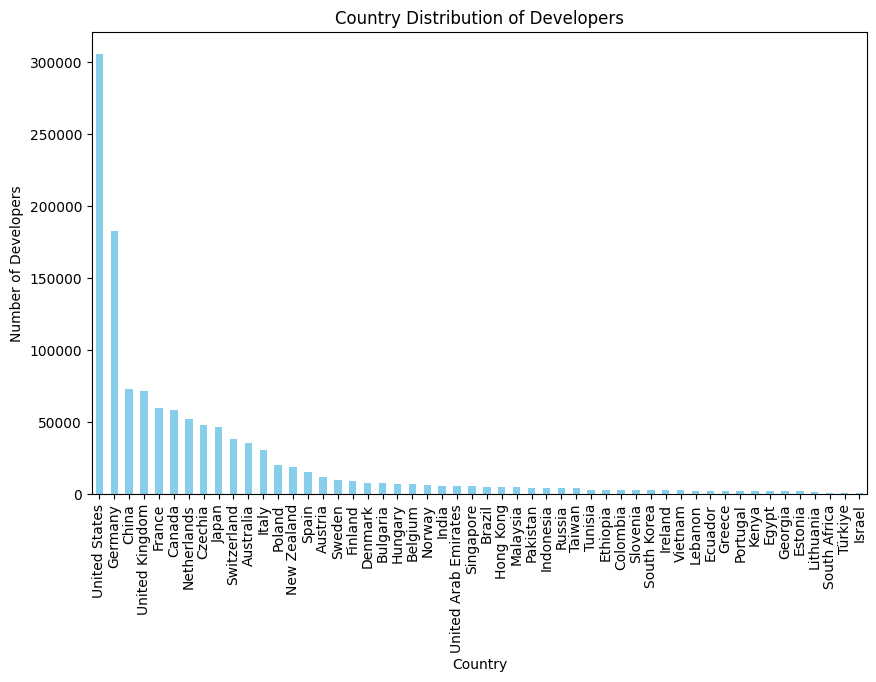

In [11]:
#1. 国家和地区分布
plt.figure(figsize=(10, 6))
country_distribution = data['country'].value_counts()
country_distribution.plot(kind='bar', color='skyblue', title='Country Distribution of Developers')
plt.xlabel('Country')
plt.ylabel('Number of Developers')
plt.savefig('country_distribution_english.png')
plt.show()

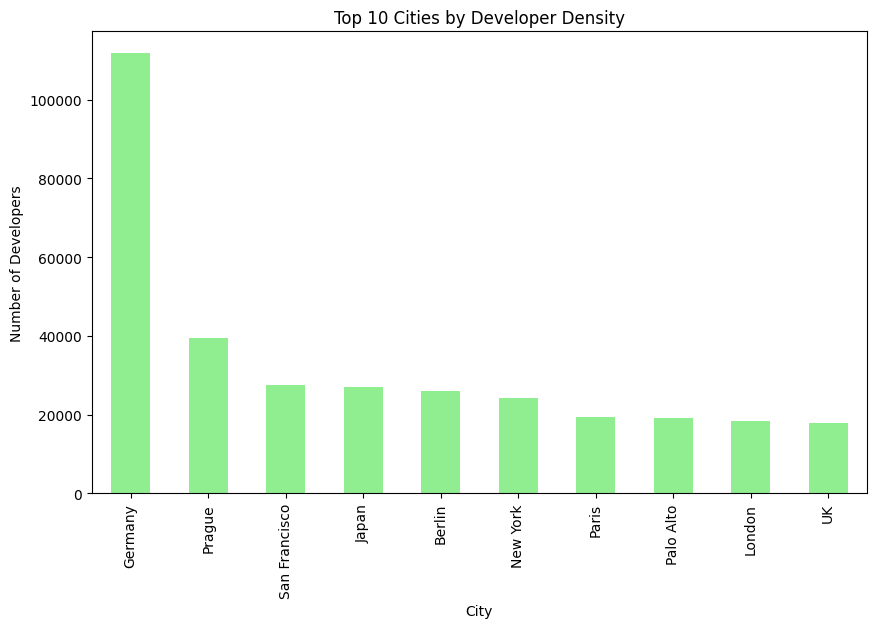

In [13]:
# 2. 城市级别分布
data['city'] = data['location'].apply(lambda x: x.split(',')[0] if ',' in x else x)  # Extract city from location
plt.figure(figsize=(10, 6))
city_distribution = data['city'].value_counts().head(10)
city_distribution.plot(kind='bar', color='lightgreen', title='Top 10 Cities by Developer Density')
plt.xlabel('City')
plt.ylabel('Number of Developers')
plt.savefig('city_distribution_english.png')
plt.show()

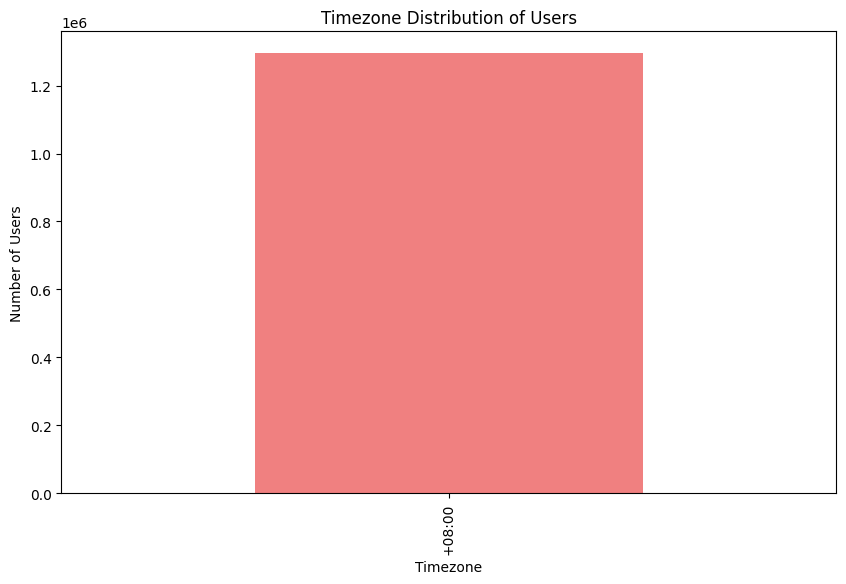

In [15]:
# 3. 时区分布
data['timezone'] = data['event_time'].str[-6:]  # Extract timezone from event_time
plt.figure(figsize=(10, 6))
timezone_distribution = data['timezone'].value_counts()
timezone_distribution.plot(kind='bar', color='lightcoral', title='Timezone Distribution of Users')
plt.xlabel('Timezone')
plt.ylabel('Number of Users')
plt.savefig('timezone_distribution_english.png')
plt.show()

## 协作行为分析

In [20]:
# 确保 event_time 是 datetime 格式
data['event_time'] = pd.to_datetime(data['event_time'])

# 统计每个用户的提交次数
commit_counts = data.groupby('user_id').size().reset_index(name='commit_count')

# 根据四分位数定义活跃程度
high_activity_threshold = commit_counts['commit_count'].quantile(0.75)
low_activity_threshold = commit_counts['commit_count'].quantile(0.25)

commit_counts['activity_level'] = commit_counts['commit_count'].apply(
    lambda x: 'High' if x > high_activity_threshold else ('Low' if x < low_activity_threshold else 'Medium')
)

# 修改显示选项以完整展示数据
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 1000)  # 设置宽度以适配显示
pd.set_option('display.colheader_justify', 'center')  # 设置表头对齐

# 显示结果
print(commit_counts)

      user_id   commit_count activity_level
0          225       2885          High    
1         1945       1526        Medium    
2         2621        796           Low    
3         4196       1983        Medium    
4         9582       2258        Medium    
5        10682       1703        Medium    
6        13564       3140          High    
7        23304       1278           Low    
8        26967       3214          High    
9        27350       4509          High    
10       32321       3284          High    
11       34168       1460           Low    
12       39889       1922        Medium    
13       40680       1366           Low    
14       44076       2165        Medium    
15       44640       1483        Medium    
16       45469       2390        Medium    
17       47313       3356          High    
18       47792       1337           Low    
19       48216       2123        Medium    
20       52195       2475        Medium    
21       54133       2393       

# 事件分布类型分析
“事件类型分布”旨在统计数据集中每种 event_type 的出现次数，分析哪些类型的事件在协作中最常被触发。这可以帮助我们了解开发者主要参与的活动类型，例如创建事件、提交代码或评论等。


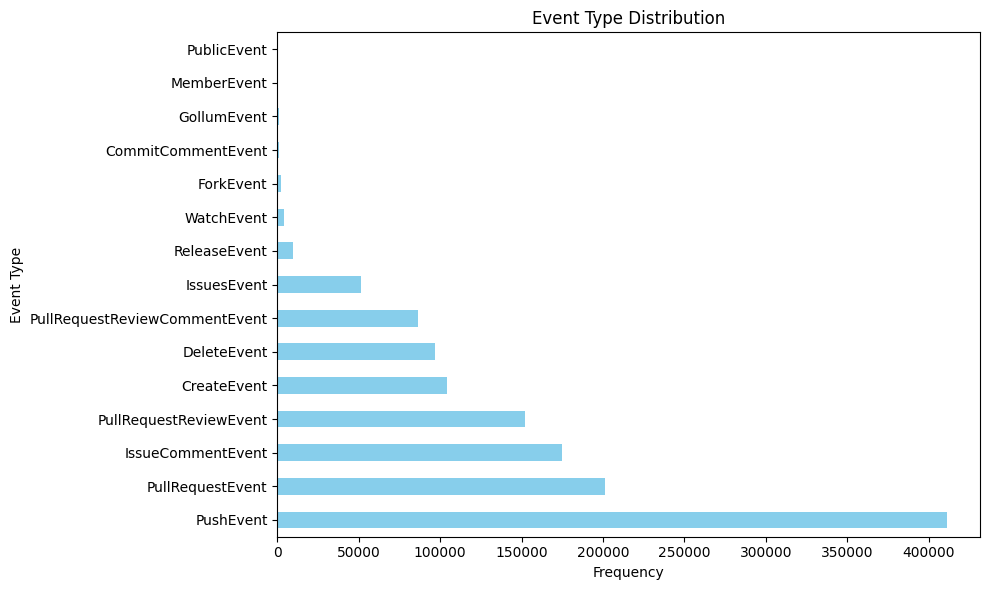

In [36]:
# Count event types
event_type_distribution = data['event_type'].value_counts()

# Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
event_type_distribution.plot(kind='barh', color='skyblue', title='Event Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Event Type')
plt.tight_layout()
plt.savefig('event_type_horizontal_bar.png')  # Save as a file if needed
plt.show()

# 影响力分数分析
· 目的：分析用户的 total_influence 分数，找出影响力最高和最低的用户群体，以及整个群体的平均影响力。这可以帮助我们了解哪些用户在协作网络中具有较大的影响力。  
· 分析维度：  
	1.	用户的平均影响力：按用户计算 total_influence 的平均值，查看整体分布。  
	2.	最高影响力用户：列出影响力排名前10的用户。  
	3.	最低影响力用户：列出影响力排名后10的用户。

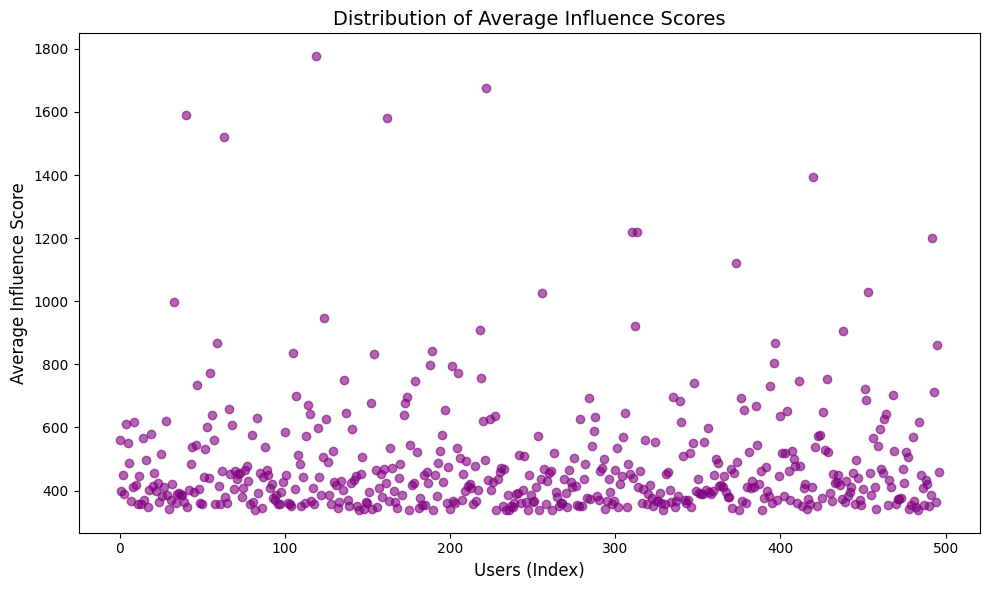

Top 10 Influential Users:
 user_id
663432      1776.967163
2892853     1674.805908
116184      1590.152954
1309177     1580.198242
195327      1520.352173
26833433    1392.865723
7258858     1220.031738
7083755     1219.017944
91018726    1201.465759
15247171    1120.395699
Name: total_influence, dtype: float64

Least 10 Influential Users:
 user_id
1819009     338.532318
8344830     338.719574
4662360     339.053680
76603072    339.097839
4140793     339.133759
16024985    339.184124
3404133     339.517609
19353690    339.586550
4354057     339.669687
3352707     339.790375
Name: total_influence, dtype: float64


In [37]:
# Ensure total_influence is numeric
data['total_influence'] = pd.to_numeric(data['total_influence'], errors='coerce')

# Calculate average influence for each user
average_influence_by_user = data.groupby('user_id')['total_influence'].mean()

# Visualize the distribution using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(average_influence_by_user)), average_influence_by_user, color='purple', alpha=0.6)
plt.title('Distribution of Average Influence Scores', fontsize=14)
plt.xlabel('Users (Index)', fontsize=12)
plt.ylabel('Average Influence Score', fontsize=12)
plt.tight_layout()
plt.savefig('influence_score_scatter.png')
plt.show()

# Top 10 influential users
top_influential_users = average_influence_by_user.sort_values(ascending=False).head(10)
print("Top 10 Influential Users:\n", top_influential_users)

# Bottom 10 influential users
least_influential_users = average_influence_by_user.sort_values().head(10)
print("\nLeast 10 Influential Users:\n", least_influential_users)